In [2]:
import numpy as np
from numpy.random import default_rng

from models import TwoStrainParams, rhs_two_strain_sirs, rhs_two_strain_sis
from sim import run_ode, run_gillespie_two_strain_sirs
from analysis import plot_ode, plot_gillespie

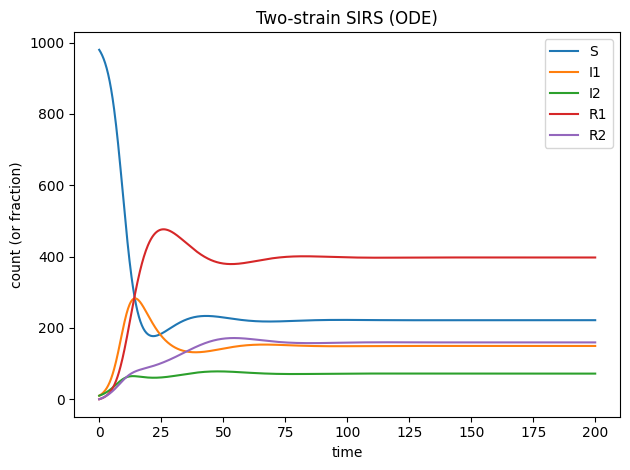

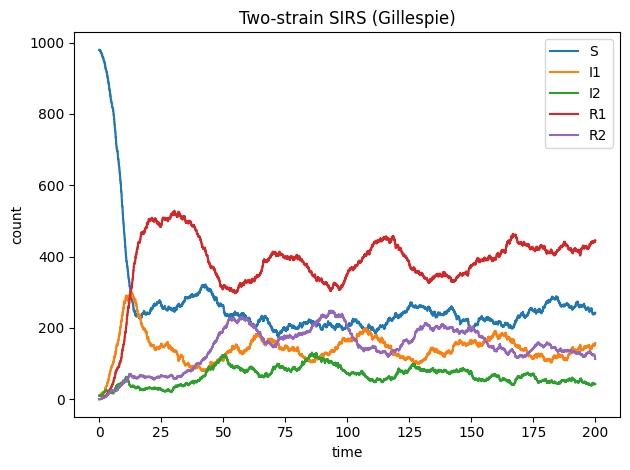

In [3]:
# -------------------------------------------------------
# Baseline experiment: ODE vs Gillespie comparison
# -------------------------------------------------------

# Model parameters (partial cross-immunity)
p = TwoStrainParams(
    beta1=0.6, beta2=0.5,
    gamma1=0.2, gamma2=0.25,
    omega1=0.05, omega2=0.05,
    sigma12=0.7, sigma21=0.7,
    N=1000
)

# Initial condition
# ODE: continuous mean-field state
y0 = np.array([980, 10, 10, 0, 0], dtype=float)
t_eval = np.linspace(0, 200, 1000)

ode = run_ode(rhs_two_strain_sirs, y0=y0, t_span=(0, 200), p=p, t_eval=t_eval)
plot_ode(ode, labels=["S","I1","I2","R1","R2"], title="Two-strain SIRS (ODE)")

# Gillespie: discrete individual-based dynamics
rng = default_rng(123)
y0_int = np.array([980, 10, 10, 0, 0], dtype=int)

stoch = run_gillespie_two_strain_sirs(y0=y0_int, t_max=200, p=p, rng=rng, record_every=5)
plot_gillespie(stoch, labels=["S","I1","I2","R1","R2"], title="Two-strain SIRS (Gillespie)")

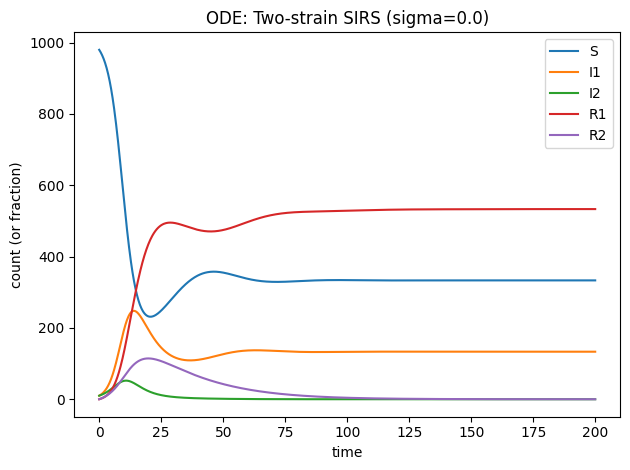

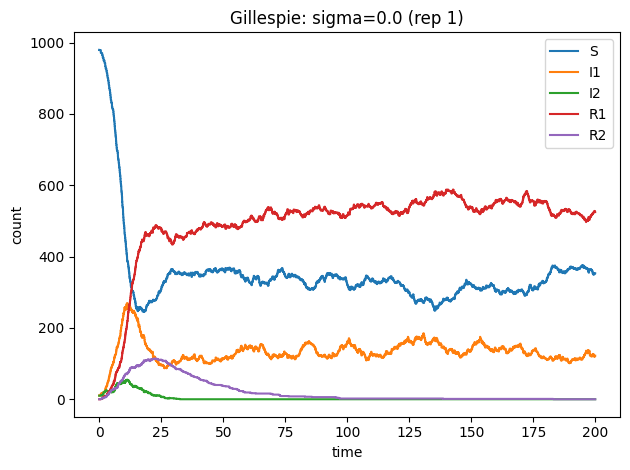

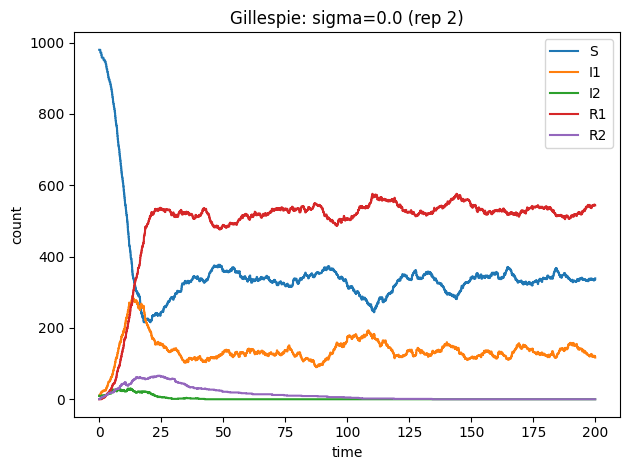

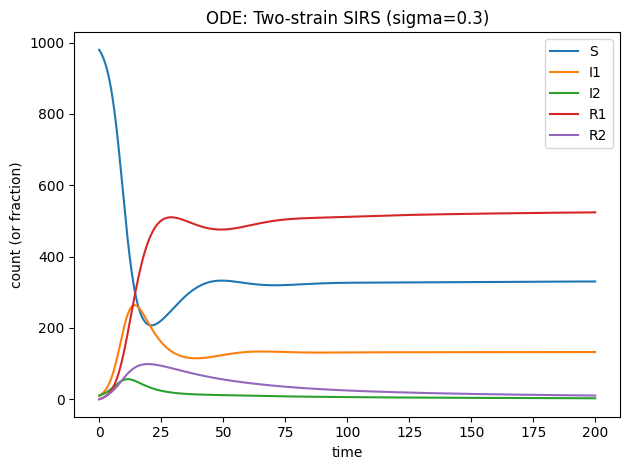

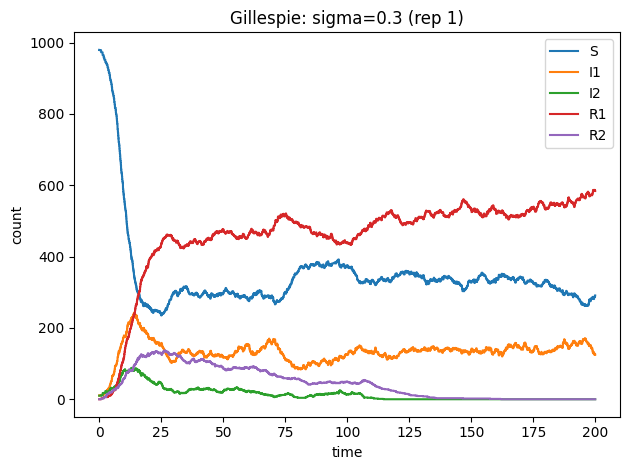

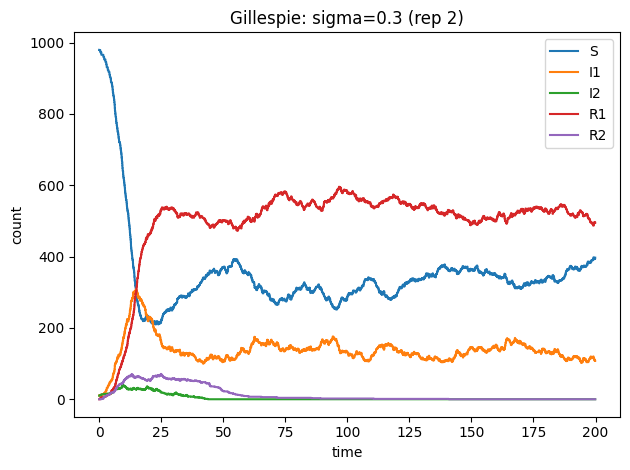

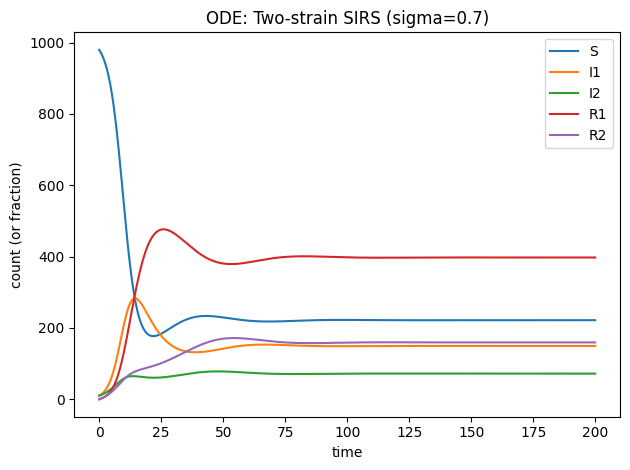

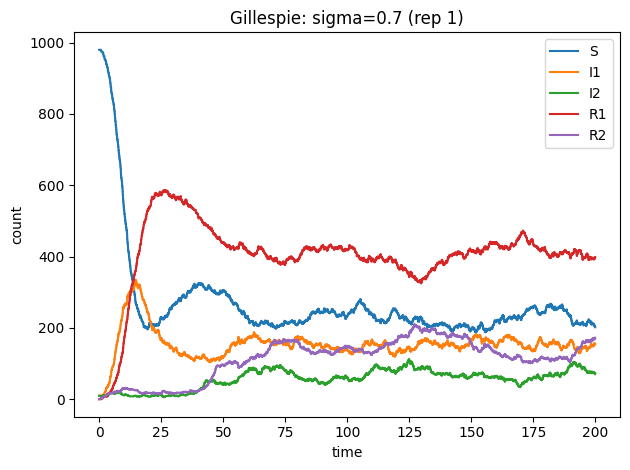

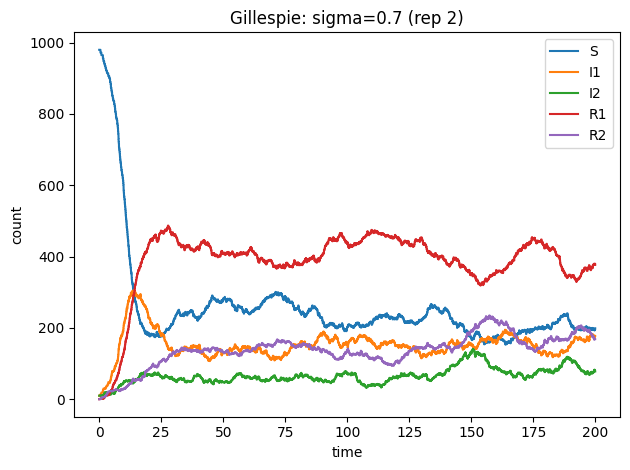

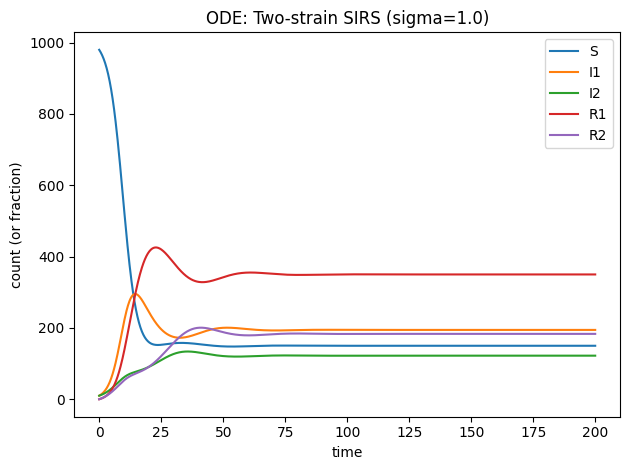

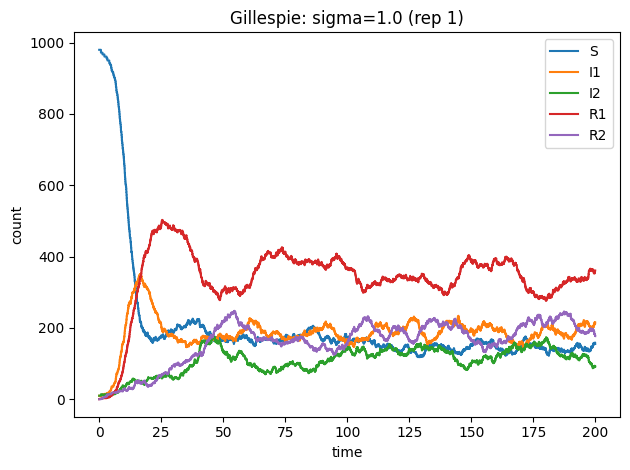

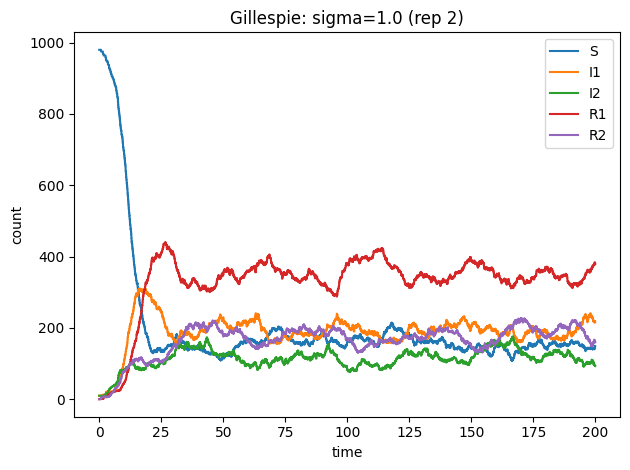

In [5]:
t_max = 200
t_eval = np.linspace(0, t_max, 1000)

sigmas = [0.0, 0.3, 0.7, 1.0]  # 0=full cross-protection, 1=no cross-protection
rng = default_rng(123)

for sigma in sigmas:
    p_sigma = TwoStrainParams(
        beta1=0.6, beta2=0.5,
        gamma1=0.2, gamma2=0.25,
        omega1=0.05, omega2=0.05,
        sigma12=sigma, sigma21=sigma,
        N=1000
    )

    # ODE
    y0 = np.array([980, 10, 10, 0, 0], dtype=float)
    ode = run_ode(rhs_two_strain_sirs, y0=y0, t_span=(0, t_max), p=p_sigma, t_eval=t_eval)
    plot_ode(ode, labels=["S","I1","I2","R1","R2"], title=f"ODE: Two-strain SIRS (sigma={sigma})")

    # Stochastic: show a couple of replicates to see variability
    for rep in range(2):
        y0_int = np.array([980, 10, 10, 0, 0], dtype=int)
        stoch = run_gillespie_two_strain_sirs(
            y0=y0_int,
            t_max=t_max,
            p=p_sigma,
            rng=rng,
            record_every=10,
        )
        plot_gillespie(stoch, labels=["S","I1","I2","R1","R2"], title=f"Gillespie: sigma={sigma} (rep {rep+1})")